In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

from resnet import ResnetBuilder

# データセットを読み込む。
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# [0, 1] に正規化する。
train_X = train_images / 255
test_X = test_images / 255

# (H, W) -> (H, W, 1) にする。
train_X = train_X[..., np.newaxis]
test_X = test_X[..., np.newaxis]

# クラス ID とクラス名の対応
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [2]:
input_shape = (28, 28, 1)  # モデルの入力サイズ
num_classes = 10  # クラス数

# ResNet18 モデルを作成する。
model = ResnetBuilder.build_resnet_18(input_shape, num_classes)

# モデルをコンパイルする。
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# 学習する。
model.fit(train_X, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 47s 776us/sample - loss: 0.8278 - acc: 0.8470
Epoch 2/5
60000/60000 [==============================] - 44s 742us/sample - loss: 0.5405 - acc: 0.8828
Epoch 3/5
60000/60000 [==============================] - 45s 744us/sample - loss: 0.4577 - acc: 0.8932
Epoch 4/5
60000/60000 [==============================] - 44s 741us/sample - loss: 0.4133 - acc: 0.9002
Epoch 5/5
60000/60000 [==============================] - 44s 741us/sample - loss: 0.3841 - acc: 0.9079


10000/10000 [==============================] - 3s 336us/sample - loss: 0.4377 - acc: 0.8882
test loss: 0.44, test accuracy: 88.82%
T-shirt/top: 0.00%
Trouser: 0.00%
Pullover: 0.00%
Dress: 0.00%
Coat: 0.00%
Sandal: 0.00%
Shirt: 0.00%
Sneaker: 0.15%
Bag: 0.00%
Ankle boot: 99.85%


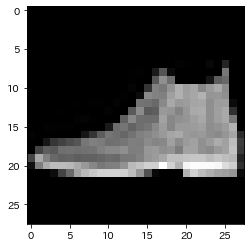

In [3]:
# テストデータに対する性能を確認する。
test_loss, test_acc = model.evaluate(test_X, test_labels)

print(f"test loss: {test_loss:.2f}, test accuracy: {test_acc:.2%}")
# test loss: 0.36, test accuracy: 86.93%

# テストデータを推論する。
predictions = model.predict(test_X)

# test_images[0] の予測結果
fig, ax = plt.subplots()
ax.imshow(test_images[0], cmap="gray")

pred = predictions[0]
for name, score in zip(class_names, pred):
    print(f"{name}: {score:.2%}")